# lab-3.01-probability


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

/tmp/ipykernel_4485/48876594.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Data Frame


## Exercise 1 - Reliability of backups

A hard drive has a 1% probability to crash. Therefore, we take two backups, each having a 2% probability to crash. The three components work independently of each other. Data is lost only when all three components crash.

Question: what is the probability that the data is not lost?

Kans op crash:
P(drive) = 0.01
P(backup1) = 0.02
P(backup2) = 0.02
Kans alle 3 crashen P(drive+backup1+backup2) = 0.01 * 0.02 * 0.02 = 0.000004
Kans dat de data niet verloren gaat = 1 - 0.01 * 0.02 * 0.02 = 99.999996

### Exercise 2

_X_ is the number of broken eggs in a random carton of 12 eggs. The probability distribution of _X_ is as follows  

| | | | | | |
| :--- | :--- | :--- | :--- | :--- | :--- |
| _X_ | 0 | 1 | 2 | 3 | 4 |
| _P(X)_ | 0.65 | 0.20 | 0.10 | 0.04 | ? |

1. Only 0, 1, 2, 3 and 4 have probabilities > 0. What is the value for _P(4)_?
2. What is the probability that a carton of 12 eggs has a maximum of 2 broken eggs?
3. What is the probability that a carton of 12 eggs has at least 9 unbroken eggs?
4. What is the probability that a carton of 12 eggs has exactly 9 unbroken eggs?
5. A palette of 800 cartons of 12 eggs will have approximately how many broken eggs?



In [2]:
# X is discrete random variabele: max aantal (kan enkel 0,1,2,3 of 4 zijn)
#1. Only 0, 1, 2, 3 and 4 have probabilities > 0. What is the value for _P(4)_?
vraag1 = 1 - (0.65+0.2+0.1+0.04)
print(vraag1)
#2. What is the probability that a carton of 12 eggs has a maximum of 2 broken eggs?
#Kans op 0, 1 of 2 gebroken eieren:
# P(0) + P(1) + P(2)
vraag2 = 0.65 + 0.2+0.1
print("Kans dat er max 2 eieren gebroken zijn: %.2f" % vraag2)
#3. What is the probability that a carton of 12 eggs has at least 9 unbroken eggs?
# Tenminste 9 eieren die niet gebroken zijn, dus max 3 eieren kapot:
# P(0) + P(1) + P(2) + P(3)
vraag3 = 0.65 + 0.2+0.1 + 0.04
print("Kans dat er minstens 9 eieren ongebroken zijn: %.2f" % vraag3)
#4. What is the probability that a carton of 12 eggs has exactly 9 unbroken eggs?
# Exact 3 eieren gebroken
vraag4 = 0.04
print("Kans dat er exact 9 eieren ongebroken zijn/exact 3 eieren gebroken zijn: %.2f" % vraag4)
#5. A palette of 800 cartons of 12 eggs will have approximately how many broken eggs?
# Verwachtingswaarde berekenen = 0* 0.65 + 0.2 * 1 + 0.1 * 2 + 0.04 *3 + 0.01 * 4 (voor 1 carton)
verwachtingswaarde_1_karton = 0* 0.65 + 0.2 * 1 + 0.1 * 2 + 0.04 *3 + 0.01 * 4
vraag5 = 800 * verwachtingswaarde_1_karton
print(vraag5)


0.009999999999999898
Kans dat er max 2 eieren gebroken zijn: 0.95
Kans dat er minstens 9 eieren ongebroken zijn: 0.99
Kans dat er exact 9 eieren ongebroken zijn/exact 3 eieren gebroken zijn: 0.04
448.00000000000006


### Exercise 3

There are two traffic lights on the route a given individual takes to go from his home to work.  
E = the event that the individual has to stop at the first light  
F = the event that the individual has to stop at the second light

$P(E)$ = 0.4  
$P(F)$ = 0.3  
$P(E ∩ F)$ = 0.15  => Kans dat E en F zich beiden voordoen. Dat er dus 2 keer gestopt moet worden is 0.15 (15%) (E ∩ F)

1. Are E and F independent events? Briefly explain why or why not?
2. What is the probability that the individual has to stop at at least one of the lights?
3. What is the probability that the individual should stop at neither light?
4. What is the probability that the individual has to stop at least at the first light?
5. What is the probability that the individual has to stop at exactly one of the lights?
6. What is the probability that the individual has to stop at only the first light?


In [17]:
E = 0.4
F = 0.3
E_en_F = 0.15
E_maal_F = 0.4 *0.3
if E_en_F == E_maal_F:
    print(f'E & F zijn onafhankelijk, ze hebben beiden de waarde {E_en_F}')
else:
    print(f'E & F zijn afhankelijk want E N F is {E_en_F} en E x F is {E_maal_F}')

# kans bij minstens 1 licht gestopt moet worden = kans op E + kans op F - kans op beiden
stop = E +F - E_en_F # E U F

# kans op geen stop (complementsregel: 1 - P (E U F))
go = 1 - stop
# E of F (niet beiden)
one_stop = E + F - 2 * E_en_F
print(one_stop)

# Only first stop
# kans op E - kans op beiden
first_stop = E - E_en_F
print(first_stop)

E & F zijn afhankelijk want E N F is 0.15 en E x F is 0.12
0.39999999999999997
0.25


In [13]:
#1. Are E and F independent events? Briefly explain why or why not?
#Independent if P(E) * P(F) = P(E ∩ F) $$𝑃(𝐴 ∩ 𝐵) = 𝑃(𝐴)𝑃(𝐵)$$
E = 0.4
F = 0.3
A = E*F
print(A)
B = 0.15
print("E en F zijn onafhankelijke events, want A is gelijk aan B (%.2f & %.2f)" % (A, B)) if A == B else print("E en F zijn afhankelijke events, want A is niet gelijk aan B (%.2f & %.2f)" % (A, B))#2. What is the probability that the individual has to stop at at least one of the lights?
#3. What is the probability that the individual should stop at neither light?
#Kans dat er gestopt moet worden bij E of F of beiden: P(E ∪ F) = P(E) + P(F) - P(E ∩ F) (general sum rule)
#Complement rule = 1 - P(E ∪ F)
general_stop = E + F - B
print("De kans dat er 2 keer gestopt moet worden is: %.2f" % general_stop)
complement_go = 1 - general_stop
print("De kans dat er geen enkele keer gestopt moet worden is: %.2f" % complement_go)
#4. What is the probability that the individual has to stop at least at the first light?
print("De kans dat er minstens aan het 1e licht gestopt moet worden: %.2f" % E)
#5. What is the probability that the individual has to stop at exactly one of the lights?
# 1 - kans op go (both) - kans op stop (both)
#P(E) + P(F) - 2P(E ∩ F) = 0.3+0.4-2*0.15
exactly_one_stop = 1 - complement_go - B
print("De kans dat er exact 1 keer gestopt moet worden: %.2f" % exactly_one_stop)
#6. What is the probability that the individual has to stop at only the first light?
# Kans E - kans beiden 
#P(E) - P(E ∩ F) = 0.4 - 0.15
only_first_stop = E - B
print("De kans dat je enkel bij het 1e licht moet stoppen is %.2f" % only_first_stop)

0.12
E en F zijn afhankelijke events, want A is niet gelijk aan B (0.12 & 0.15)
De kans dat er 2 keer gestopt moet worden is: 0.55
De kans dat er geen enkele keer gestopt moet worden is: 0.45
De kans dat er minstens aan het 1e licht gestopt moet worden: 0.40
De kans dat er exact 1 keer gestopt moet worden: 0.40
De kans dat je enkel bij het 1e licht moet stoppen is 0.25


## Exercise 4

A box contains five pieces of paper marked €1, €1, €1, €10 and €25.  
A player chooses two pieces of paper and then wins the larger of the amounts on the two pieces of paper.  
Define a discrete random variable _X_ with _X_ = amount won.  
1. Determine the discrete probability distribution of this game
- $P(X = 1) = ?$
- $P(X = 10) = ?$
- $P(X = 25) = ?$
2. In *Prob_X* below, replace [0.1, 0.3, 0.5] with the values found for a graphical representation of the discrete probability distribution.  
3. Calculate the expectation value (expectation) of the random variable _X_.  


(Hint: consider the pieces of paper as numbered 1, 2, 3, 4 and 5.)


| Paper | 1 | 10 | 25  | 
|---|---|---|---|
| P(X)|3/5|1/5|1/5|

- $P(X = 1) = 3/5$
- $P(X = 10) = 1/5$
- $P(X = 25) = 1/5$

MAAR er worden 2 briefjes getrokken en hoogste wordt behouden!
Kans op 25?
P(X=25)= P(Eerste keer 25) * P(gelijk wat) + P(eerste keer geen 25) * P(2e keer 25 EUR (als de 1e keer geen 25 getrokken))
P(X=25)= 1/5 * 1 + 4/5*1/4 (4 want er schieten nog maar 4 briefjes over)
x_25 = 1/5*1+4/5*1/4
P(X=10)=P(Eerste keer 10) * P(gelijk wat) + P(eerste keer geen 10) * P(2e keer 10 EUR (als de 1e keer geen 10 getrokken)) - KANS (P(eerste keer 10) * P(tweede keer 25) + P(eerste keer 25) * P(tweede keer 10))
x_10 = 1/5*1+4/5*1/4 - (1/5 * 1/4 + 1/5 * 1/4) 
OF MAKKELIJKER:
Kans op 10: 1/5 * 3/4 (want als je 25 trekt, ga je niet 10 nemen) + 3/5(kans dat het eerste keer geen 10 is, maar ook geen 25, want anders neem je ook niet 10 maar 25) * 1/4 (kans op 10)
p(X=10)= 1/5 * 3/4 + 3/5 * 1/4
of Complementregel:
P(X=1) = 1 - P(X=10) - P(X=25)

In [26]:
x_25 = 1/5*1+4/5*1/4
x_10 = 1/5*1+4/5*1/4 - (1/5 * 1/4 + 1/5 * 1/4)
x_1 = 1 - x_25 - x_10
print(x_25)
print(x_10)
print(x_1)
#Verwachtingswaarde
verwachtingswaarde = 1*3/10 + 10*3/10 + 25*4/10
print("De verwachtingswaarde is %.2f" % verwachtingswaarde)


0.4
0.30000000000000004
0.29999999999999993
De verwachtingswaarde is 13.30


De verwachtingswaarde is 7.60


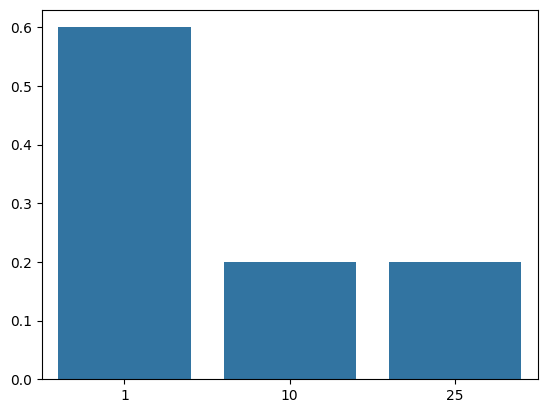

In [21]:
X = [1, 10, 25]
Probability_X = [3/5,1/5,1/5]
sns.barplot(x = X, y= Probability_X)
#Verwachtingswaarde
probability = 1 * 3/5 + 10* 1/5 + 25 * 1/5
print("De verwachtingswaarde is %.2f" % probability)

In [ ]:
X = [1, 10, 25]           # Possible outcomes. Leave unchanged!!!
Prob_X = [0.1, 0.3, 0.5]  # Replace with your own found values!!!
sns.barplot(x = X, y = Prob_X) # Visual representation. Leave unchanged!!!

### Exercise 5
John participates in an online game of chance. He can win EUR 1, EUR 2, EUR 3, EUR 4 or EUR 5. The probability of winning X EUR is directly proportional to the amount to be won, in other words  
$p(x) = k * x $ for x = 1, ... , 5
1. What is the value for k?
2. What is the probability of winning a maximum of EUR 3?
3. Suppose Jan participates in the game of chance 100 times. Approximately how much will he then win?

| EUR won | 1 | 2 | 3 | 4 | 5 | 
|---|---|---|---|---|---|
| P(X)|1/15|2/15|3/15|4/15|5/15|

In [19]:
#1. What is the value for k?
universum = 1
#1* k + 2 * k + 3* k + 4* k + 5*k = 1
# 1 = k * (1+2+3+4+5)


k=1/15
print("K is %.4f" % k)
#2. What is the probability of winning a maximum of EUR 3?
kans_op_max_3 = 1*15 + 2*1/15 + 3*1/15 
print("De kans op maximum 3 euro is %.2f" %kans_op_max_3)
#3. Suppose Jan participates in the game of chance 100 times. Approximately how much will he then win?
#Verwachting berekenen (voor 1 spel)
verwachting = 1 * 1/15 + 2 * 2/15 + 3 * 3/15 + 4* 4/15 + 5 * 5/15
verwachting_winst_bij_100 = 100 * verwachting
print("De verwachte winst na 100 spelletjes is %d" % verwachting_winst_bij_100)

K is 0.0667
De kans op maximum 3 euro is 15.33
De verwachte winst na 100 spelletjes is 366


### Exercise 6 - Probabilities for normal distributions

Calculate the given probabilities in the standard normal distribution $Z \sim Nor(\mu=0, \sigma=1)$. Compare your solutions with the given answers.

|     | Calculate the following probabilities:             | Answer: |
| :-- | :--------------------- | :------ |
| 1.  | $P(Z < 1.33)$          | 0.908   |
| 2.  | $P(Z > 1.33)$          | 0.092   |
| 3.  | $P(Z < −1.33)$         | 0.092   |
| 4.  | $P(Z > −1.33)$         | 0.908   |
| 5.  | $P(Z < 0.45)$          | 0.674   |
| 6.  | $P(Z > −1.05)$         | 0.853   |
| 7.  | $P(Z < 0.65)$          | 0.742   |
| 8.  | $P(−0.45 < Z < 1.20)$  | 0.559   |
| 9.  | $P(−1.35 < Z < −0.10)$ | 0.372   |
| 10. | $P(−2.10 < Z < −0.90)$ | 0.166   |

In [ ]:
m = 0
s = 1



### Exercise 7 - Plot probability density
Make a graphical plot of the probability density function and the cumulative distribution function of a normal distribution with $\mu = 2.5$ and $\sigma = 1.5$.

What is the area under the density function between  x=0.5  and  x=4 . (Answer = 0.750)

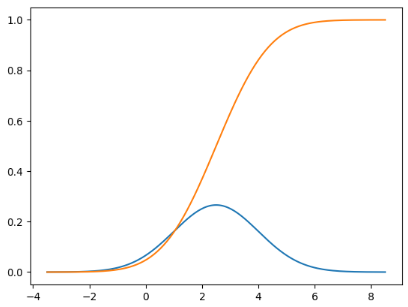

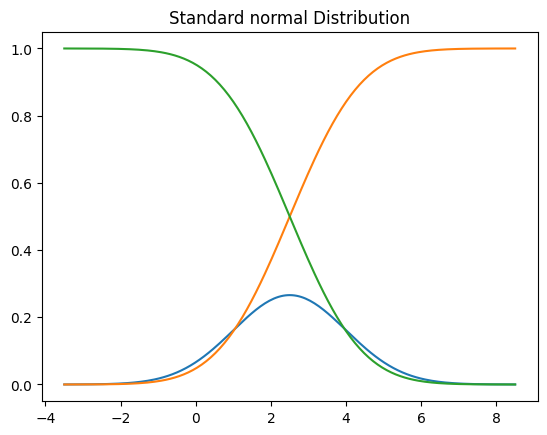

In [31]:
mu = 2.5
sigma = 1.5
x = np.linspace(mu -4 * sigma, mu+4*sigma, num=201)
y = stats.norm.pdf(x,mu,sigma)
plt.plot(x,y)
plt.title("Standard normal Distribution")
z= stats.norm.cdf(x,mu,sigma)
plt.plot(x,z)
a= stats.norm.sf(x,mu,sigma)
plt.plot(x,a)



### Exercise 8 - Theoretical vs real probability density
Generate 25 random numbers distributed according to the standard normal distribution. Plot a histogram with probability density function and the theoretical probability density.
Do the same for 250 and 2500 numbers.
Notice how the real probability density approaches the theoretical one as the sample size increases.

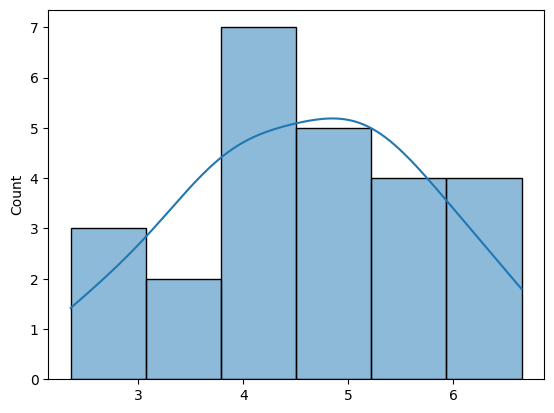

In [33]:
# Generate n random numbers, following a normal distribution
m = 5    # Mean
s = 1.5  # Standard deviation

# Increase the value for n and see how the histogram changes!
n = 25
observations = np.random.normal(loc=m, scale=s, size=n)

# Plot histogram, without probability density
obs_hist = sns.histplot(observations, kde=True)
n = 250
observations = np.random.normal(loc=m, scale=s, size=n)
n = 2500
observations = np.random.normal(loc=m, scale=s, size=n)

### Exercise 9

Suppose that the distribution of net typing speed in
words per minute (wpm) for experienced typists can be
approximated by a normal curve with mean 60 wpm and
standard deviation 15 wpm
1. What is the probability that the net typing speed of a randomly selected typist
is at most 60 wpm?
2. What is the probability that the net speed of a randomly selected typist's
net speed is between 45 and 90 wpm?
3. Would you be surprised to find a typist
whose net speed is higher than 105 wpm?
4. Suppose special training will be given to the slowest 20% of typists. Which typing speeds would qualify for this training?

In [13]:
mu = 60
sigma = 15
#1. What is the probability that the net typing speed of a randomly selected typist is at most 60 wpm?
print("De kans dat het max 60 is P(Z <= 60) , is: %.2f" % stats.norm.cdf(60, loc=mu, scale=sigma))
#2. What is the probability that the net speed of a randomly selected typist's net speed is between 45 and 90 wpm?
print("De kans dat het tussen 45 & 90 ligt P(45 <= Z <= 90) , is: %.2f" % (stats.norm.cdf(90, loc=mu, scale=sigma)-stats.norm.cdf(45, loc=mu, scale=sigma)))
#3. Would you be surprised to find a typist whose net speed is higher than 105 wpm?
print("De kans dat het sneller dan 105 is P(Z < 105) , is: %.8f" % stats.norm.sf(105, loc=mu, scale=sigma))
#4. Suppose special training will be given to the slowest 20% of typists. Which typing speeds would qualify for this training?
print("Welke snelheid is drempel laagste 20%% is P(Z = 20%%) , is: %.2f" % stats.norm.isf(0.8, loc=mu, scale=sigma))

De kans dat het max 60 is P(Z <= 60) , is: 0.50
De kans dat het tussen 45 & 90 ligt P(45 <= Z <= 90) , is: 0.82
De kans dat het sneller dan 105 is P(Z < 105) , is: 0.00134990
Welke snelheid is drempel laagste 20% is P(Z = 20%) , is: 47.38


## Exercise 10

Consider the two games of chance mentioned in the slides:

- Bet on: at least one six when throwing a fair die 4 consecutive times.
- Bet on: at least one "double six" when throwing two fair dice 24 times.

Question: calculate the exact probability of winning each of these two games. Compare your answer with the long-term frequency of winning shown in the slides.

In [16]:
# 1 - kans dat je nooit 6 gooit
chance_one_six = 1/6
#Kans dat je nooit 6 gooit:
never_six = 5/6 * 5/6 * 5/6 * 5/6
chance_on_six_4_throws = 1 - never_six
print(chance_on_six_4_throws)

# Kans op minstens 2 zessen bij 24 beurten van 2 dobbelstenen
#Kans op dubbele 6
chance_double_six = 1/6 * 1/6
# Nooit dubbele 6 
no_chance_double_six = 1 - chance_double_six
never_six_24_times = no_chance_double_six ** 24
chance_six_24_times = 1 - never_six_24_times
print(chance_six_24_times)


0.5177469135802468
0.4914038761309034


## Exercise 11 - Expectation of $X-a$

Consider the probability distribution of the random variable $X$ giving the sum of the eyes when throwing two dice.

- This probability distribution is symmetric around 7. Verify (by using the definition of expectation) that the expectation of $X$ is also 7.

- Suppose that you have to pay €8 to play a game where your earnings are the sum of the eyes when throwing two dice. Denote your profit (or loss) by $Y$. What is the relationship between $Y$ and $X$? Give the expectation of $Y$. What is the relationship with the expectation of $X$?

- Can you see a general relationship between the expectation of $X − a$ and that of $X$, where $a$ is a real number?

In [ ]:
#Verwachtingswaarde = 7, maar je trekt van alle waarden telkens a af. 
#Dan zal je alles inclusief de verwachtingswaarde ook met a zakken.

## Exercise 12 - Variance of $X/a$

Consider the probability distribution of the random variable $X$ giving the sum of the eyes when throwing two dice.

- Calculate the variance of $X$.

- Suppose the profit you make is only half of the sum of the eyes when throwing two dice. Denote your profit (or loss) by $Y$. What is the relationship between $Y$ and $X$? Give the variance of $Y$. What is the relationship with the variance of $X$?

- Can you see a general relationship between the variance of $X/a$ and that of $X$, where $a$ is a real non-zero number?

In [ ]:
#Niet zo belangrijk
#(1/(a**2)) * variantia

## Exercise 13 - Expectation and variance of $(X−\mu)/\sigma$)

Using the information from the two previous exercises, determine the expectation and variance for a random variable $Z$ given by

$Z = \frac{X-\mu_X}{\sigma_X}$